In [7]:
# don't show 
randomize <- function(size) { 
  ## this is a dead-simple randomizer 
  ## ---   
  ## inputs: the size of the population (must be even)
  ## ---
  ## output: a vector of 1s and 0s 

  list_of_assignments <- c(rep(0, size/2), rep(1, size/2))
  randomized_assignments <- sample(list_of_assignments)
  
  return(randomized_assignments)
  } 

est_ate <- function(outcome, treat) { 
  mean(outcome[treat==1]) - mean(outcome[treat==0])
  } 

In [8]:
# show on 15 
d <- data.frame(
    group = c(rep("Man", 20), rep("Woman", 20)), 
    po_control = c(1:20, 51:70),
    po_treat   = c(1:20, 51:70) + 25
    )

In [10]:
# show on 18
d$treat <- randomize(40)
head(d)

In [13]:
# show on 19
d$outcomes <- ifelse(d$treat == 1, d$po_treat, d$po_control)
tail(d)

,group,po_control,po_treat,treat,outcomes
35,Woman,65,90,1,90
36,Woman,66,91,0,66
37,Woman,67,92,0,67
38,Woman,68,93,0,68
39,Woman,69,94,1,94
40,Woman,70,95,0,70


In [14]:
ate <- est_ate(d$outcomes, d$treat)

In [16]:
ate

[1] 1.3

In [17]:
# don't show 
ate <- 28.5

In [18]:
# show on 26
dist_under_sharp_null <- NA 

for(i in 1:5000){ 
    d$treat <- randomize(40)
    dist_under_sharp_null[i]  <- est_ate(d$outcomes, d$treat)
}

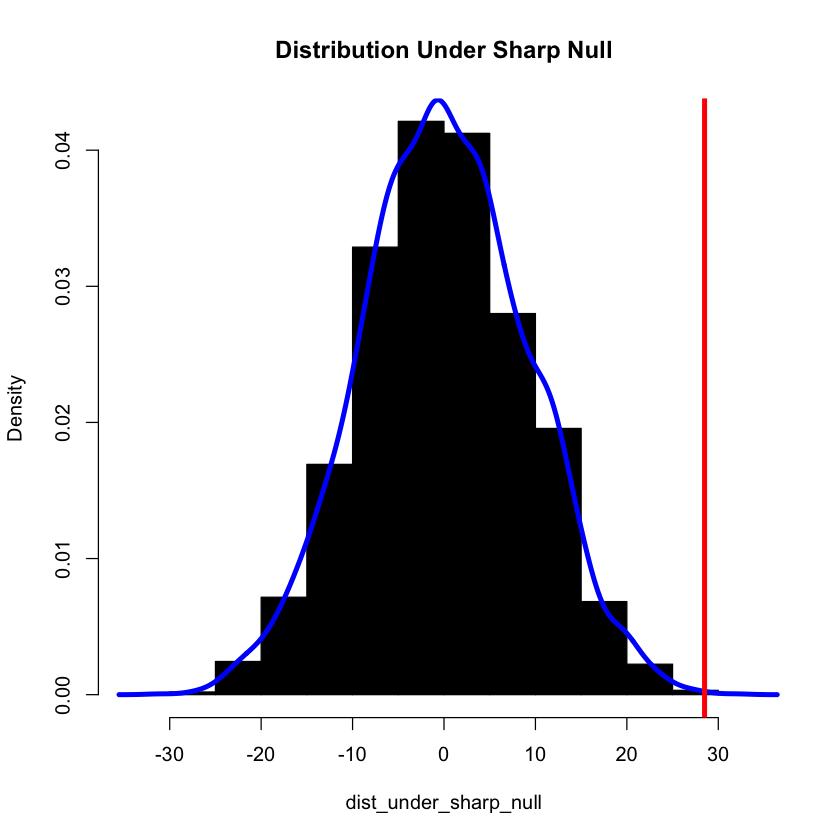

In [19]:
# show on 30 
hist(dist_under_sharp_null, freq = FALSE,
     col = "black", 
     main = "Distribution Under Sharp Null"
     )
lines(density(dist_under_sharp_null), lwd = 4, col = "blue")
abline(v = 28.5, col = "red", lwd = 4)

In [20]:
# show on 32 
mean(ate < dist_under_sharp_null)

[1] 4e-04